In [1]:
import torch
import matplotlib.pyplot as plt
from torchmetrics import JaccardIndex


ModuleNotFoundError: No module named 'torchmetrics'

In [2]:
# Load our own modules
import sys

sys.path.append("../src")

from data import *

/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
dataset = ValidationDataset("../Dataset_Student")
val_dataloader = torch.utils.data.DataLoader(dataset, batch_size=5, num_workers=2)

torch.Size([22, 3, 256, 256])
(22, 160, 240)


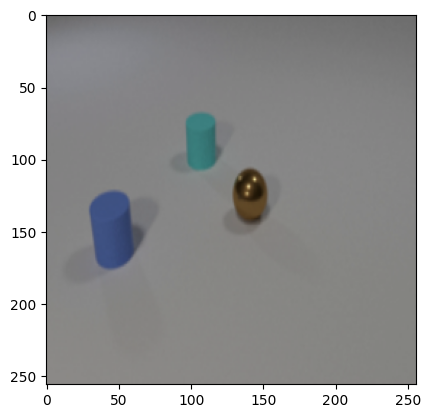

In [4]:
import matplotlib.pyplot as plt

labeled = LabeledDataset("../Dataset_Student")
unlabeled = UnlabeledDataset("../Dataset_Student")

x, masks = labeled[2]
print(x.shape)
print(masks.shape)

plt.imshow(unnormalize(x[0]).permute(1,2, 0))



/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


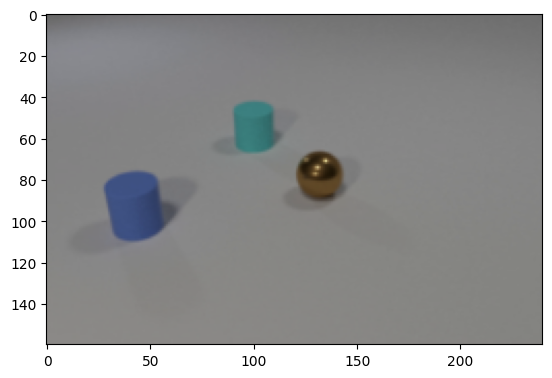

In [5]:

resized = transforms.Resize((160, 240))(x[0]) 
plt.imshow(unnormalize(resized).permute(1,2,0))

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)


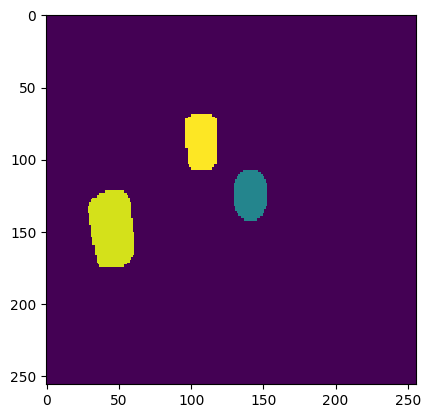

In [8]:
mask = unresize_mask(masks[0])

print(mask)

plt.imshow(mask, interpolation="none")



In [7]:
model = torch.load("testseg.pkl", map_location=torch.device('cpu'))

FileNotFoundError: [Errno 2] No such file or directory: 'testseg.pkl'

In [ ]:
# First, get a mask and observe it
model.eval()

with torch.no_grad():
    x, label = dataset[22]
    x = x.unsqueeze(0)

    x = x[:, :11]
    # Transpose, since video resnet expects channels as first dim
    x = x.transpose(1, 2)
    mask = torch.argmax(model(x), dim=1)

    print(torch.max(mask))
plt.imshow(mask[0])


In [ ]:

plt.imshow(label[21])